In [1]:
# importing function from a different ipny 
import pandas as pd
import collections
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from functools import reduce
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_sm")
tokenizer = Tokenizer(nlp.vocab)
pd.options.display.max_columns = 1000
from keras.utils import to_categorical
#https://machinelearningmastery.com/deep-learning-bag-of-words-model-sentiment-analysis/

/home/titli/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
keras_data = pd.read_csv('subject_spam.csv', index_col=0, encoding='utf8', engine='python')
keras_data.fillna("_na_", inplace = True)
keras_data = keras_data.drop(keras_data[keras_data.isspam == "_na_"].index)
spammer = {'spam ': 1,'ham ': 0} 
keras_data.isspam = [spammer[item] for item in keras_data.isspam] 
spam_index = keras_data[keras_data.isspam ==1].index
ham_index = keras_data[keras_data.isspam == 0].index
new_index = np.concatenate((spam_index[:1000], ham_index[:1000]), axis=0)
keras_data_new = keras_data.iloc[new_index]
labels = keras_data_new.isspam.values
labels = to_categorical(np.asarray(labels))
keras_data_new.head()

,Subject,isspam
0,"Confidential :Soma:, Ci@lis, :P:ntermin",1
1,¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...,1
2,_na_,1
3,StOck 0ppurtunities - their sh0Oting,1
6,All your prescr[iption needs right here,1


In [3]:
## New code 
def iter_spacy(strs, tokenizer):
    words = []
    for s in strs:
        #doc = nlp(s)
        doc = tokenizer(s)
        tokens = [str(token) for token in doc]
        counts = collections.Counter(tokens)
        yield counts

In [4]:
bows_spacy = pd.DataFrame(iter_spacy(keras_data_new.Subject, tokenizer )).fillna(0).astype(int)

In [5]:
indices = np.arange(bows_spacy.shape[0])
np.random.shuffle(indices)
bows_spacy = bows_spacy.iloc[indices]
labels = labels[indices]

In [6]:
bows_spacy.shape

(2000, 3887)

In [7]:
bows_spacy.head(5)

,,,,,,,,,,,,,,,,!!,!ÃÖ°íÀ¯¸ÁÁ÷,"""","""5""","""H0me","""Super","""Tax""","""tax""","""Á÷ÀåÀÎ","""ÃÖÀú",#,#35,#38;,#8,#>CCA4275863<#,$$$,$.01,$1,$10,"$10,",$20,$275,$65,$75,&,'01,'Oops','secure','¿Á¿Ü°ø°í»ç',(1000¸í,(2),(4:30,"(6,500¿ø)",(Advance,(CE,"(Cia1is),",(Draft),(ER01-1807),(ER01-2327),(GADS),(GCP,(Incl.,(Kathy,(Norman),(Power,(RP00-336),(Relay),(Success),(Swap,(V13.2),(Violation/Notification,(West,(if,(¡©¡©±¤¡©°í¡©)¦¡¦¬°í±ÞÀüµ¿Ä©¼Ö,(°øÂ¥)¹«·á·Î!,(±¤°í),(±¤°í)¢À*Á¶·ç¿¡,(±¤°í)¹ÏÀ»¼öÀÖ´Â,(±¤°í)ÇÊµ¶!-,(»ó´ã½ÅÃ»´ëÈ¯¿µ)@,(¾¦,(Áß°íÈÞ´ëÆùÀ»,(ÇÐ½ÀÁ¤º¸)»ì¾ÆÀÖ´Â,(ÇÑÁ¤¼ö·®),*'.Cheap,*As,*EMCA*,+Cheap,",",",,,'Buy",",Á÷¾÷¿î,»ç¾÷¿î,Ãë¾÷¿î,",-,--,-0600,-Oct.,-RESCHEDULED,-Susan,-`'~Cheao,-°¡°ÝÆÄ±«-,-¹«·áÁ¦°ø-,-¹éÈ­Á¡³³Ç°¿ë-,-¼±Âø¼ø-,-Ã¢¸³±â³ä-,.-=.'Best,...,...@,..È­»óÀº,/,00110100078161,00:04:01,01,"04,","05,","07,",07/24/01,07:18:57,08/04/01,08/06/01,08/13/01,08/15/01,08/31/2001),09,09-01-01,09-04-01,09/04/2001,09/13/2001),096276,0RIGINAL,0f,0ffers:,0fffice,0n,0ppurtunities,0ut,1,1%´ë,1-800,10,"10,",10-29-01,10-9-01,10/08/2001),10/09-10/01,10/09/2001,10/09/2001),10/10/01,10/10/01;,10/10/2001,10/11/01,10/2-4/01,10/22-24/01,10/29/01,10/29/01;,10/29/2001,10/29/2001),10/30,10/30/01;,10/5/01,10/8,10/9/01,10/9/01;,100%,100%´ëÃâº¸Àå/Ä«µå´ëÃâ/Á÷ÀåÀÎ,100-3000Ãµ±îÁö,100-5000¸¸¿ø±îÁö,1000s,1009,10:09:20,10;,"10AM,",10_10_01LO3.xls,10th,10³â³ëÇÏ¿ì,10³âÀü,11/09/01-11/10/01,11/11/01,11/9/01,11;,12,"12,",12:15,13,"13,",14,"14,",1487,14th,15,15:02:41,16,"16,",16È¸,"17,",18,"18,",18;,19,19;,1;,1st,1~2,1È¸!,2,"2000¸¸¿ø±îÁö(¹«¹æ¹®,¹«¼­·ù",2000¸í¿¡°Ô,2001,2001+02,2002,2003,2004,2005,"2005-Vales,Pumps,Seals,Pipings,Fittings,Flow",2005³â,20;,20O0,20th,"21,",21;,21th,21¼¼±â,22,"22,",2234,22;,"23-24,",23;,24,240,24;,24°³¿ù,24½Ã°£¾È¿¡,26th,27,"28,",282481,2876,28th,29,"29,",2;,2nd,2o05,3%´ë,3.25,3.25%,"30-31,",30th,30ºÐ³»,31,"31,",32958902/002,35th,36077),365¾ðÁ¦³ª,36°³¿ù,36°³¿ùºÐÇÒ»óÈ¯,386794,3:00,3:30,3;,3rd,3th,4,"4,",4/15,4775,494403,4:30.,4;,4pm,5%,"5/21/01,",50,501,5719,5;,5th,5ºÐÀÌ³»,5Ãµ¸¸¿ø±îÁö,5Ãµ¸¸¿ø±îÁö!~,6,"6,000¸¸¿ø",6/01,6/16],65,661292,67,694b0c¡@(³Ì·s,6;,6PM,6ÀÏ,7,"7,",7/26,705512.1,715300,7556363,7872,7:00,7;,8,"8,",8-06-01,8-10-01,8-16-01,8-22-01,8/10/01,8/16/01,8/17/01,8/22/01,8/3/01,8/31/01,840514,8:00,8;,8th,9,9-04-2001,9-14-2001,9/14/01,9/4,9/4/2001,9/5/01,9/9,90/110,92854570,9654,9900¿ø,9;,:,:=`Best,:P:ntermin,":Soma:,",<<Concur,<CODESITE>,<File,=?Big5?B?qGuka2RpeabbvKKlzqt+oUKxob3sq72rvQ==?=,=?Big5?B?qGumUKfTsaG97KXOq35+fg==?=,=?Big5?B?tn3C6qGprEvDxKFCssWpR6FCveSzTqFCuXG4o6RKq0kyMDA1LzEvMTggpFekyA==?=,=?Big5?B?vse3fLlxuKOrT7vZsXqquqW8qNMhMjAwNS8xLzE4IKRXpMg=?=,=?GB2312?B?1ebV/bXEw+K30dfK1LS5ss/t1tDQxKOh?=,=?GB2312?B?SVNPOTAwMKGiSVNPMTQwMDChok9IU0FTMTgwMDC24MO9zOXF4NG1sPyhqqGq?=,=?GB2312?B?w+K30bXEyMu8yrnYz7XN+A==?=,=?ISO-2022-JP?B?GyRCIVo0fDRWOEJEaiFbJU8lYSVPJWElT0JnMiY4d05X?=,=?ISO-2022-JP?B?GyRCJEMkRiQnInYbKEI=?=,=?ISO-2022-JP?B?GyRCJF4kayRfJCghKiQqJDkkOSRhJTUlJCVIGyhC?=,=?ISO-2022-JP?B?GyRCOSUkLUp8QmolNyRBJGMbKEI=?=,=?ISO-2022-JP?B?GyRCPz83dSRKJCo0aiQkGyhC?=,=?US-ASCII?B?QnVzaW5lc3MgT2ZmZXI=?=,=?Windows-1251?B?0NLNzsPOIMrOzdLQzsvfISEhIM/OzM7Z3CDP0Mgg0MXDyNHS0MDWyMggzcAg0MXJ?=,=?Windows-1251?B?0OXq6+Ds4DogwdvR0tDOxSDP0M7VzsbExc3IxSDSwMzOxsXNzc7DziDIIM/A0c/O?=,=?Windows-1251?B?0OXq6+Ds4DogwsjH2yDCINDO0dHI3iDIINDFw8jR0tDA1sjfISEh?=,=?Windows-1251?B?0SEhIQ==?=,=?Windows-1251?B?8uX17ejq4CDv8O7i5eTl7ej/IPHu4uX54O3o6Q==?=,=?Windows-1251?q?=E0_=EC=EE=E6=E5=F2_=E1=FB=F2=FC=3F?=,=?big5?B?U3ViamVjdDogRnc6tLazcaq6qkKkzSBWUyCvdaW/qrqqQqTNIA==?=,=?big5?Q?Fwd:=B6W=AC=D9=BF=FA=AA=BA=B9q=B8=DC=A5d~=B8=D5=B8=D5!!!?=,=?gb2312?B?1NrP+8+iICJSZTogRGVsaXZlcnkgUHJvdGVjdGlvbiLW0Leiz9ayoba+?=,=?iso-2022-jp?B?GyRCJSIlViVOITwlXiVrQk44M0NMGyhC?=,=?iso-2022-jp?B?GyRCJTslLyVPJWkbKEI=?=,=?iso-2022-jp?B?GyRCJTslLyVPJWlIbzMyJHIkSSROTU0kSzJzSHIkOSRrJCshKRsoQg==?=,=?iso-2022-jp?B?GyRCMV8kRzMrNkgkNyReJDskcyQrISohKhsoQg==?=,=?iso-2022-jp?B?GyRCQCQzJkNmJE49dyROO1IkLDBsSFZBR0Q+JEskSiRsJGtGfBsoQg==?=,=?iso-2022-jp?B?GyRCTCQ+NUJ6OS05cCIoQC4kOyRQJEokayEqGyhCNTAwMA==?=,=?

### Test-train split

In [29]:
bows_spacy_train = bows_spacy[:1600].values.reshape(1600,3887,1)
bows_spacy_test = bows_spacy[1600:].values.reshape(400,3887,1)
y_train= labels[:1600]
y_test= labels[1600:]

In [9]:
batch_size = 32
embedding_dims = 3887
filters = 250
kernel_size = 2
hidden_dims = 250
epochs = 30

In [26]:
import numpy as np
from keras.models import Model
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Input, BatchNormalization, MaxPooling1D
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPool1D, Flatten , Embedding
#sequence_input = Input(shape=(embedding_dims,), dtype='int32')
#embedded_sequences = embedding_layer(sequence_input)
inp =  Input(shape=(embedding_dims, 1))
x = Conv1D(128, 5, activation='relu')(inp)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(2, activation='softmax')(x)
model = Model(inp, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3887, 1)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 3883, 128)         768       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 776, 128)          0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 772, 128)          82048     
_________________________________________________________________
max_pooling1d_6 (MaxPooling1 (None, 154, 128)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 150, 128)          82048     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
__________

In [30]:
history = model.fit(bows_spacy_train, y_train,
          batch_size=16,
          epochs=10,
validation_data=(bows_spacy_test, y_test))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 25s 16ms/step - loss: 0.6895 - acc: 0.5556 - val_loss: 0.6804 - val_acc: 0.5875
Epoch 2/10
1600/1600 [==============================] - 25s 15ms/step - loss: 0.6627 - acc: 0.6038 - val_loss: 0.6803 - val_acc: 0.5750
Epoch 3/10
1600/1600 [==============================] - 24s 15ms/step - loss: 0.6455 - acc: 0.6350 - val_loss: 0.6470 - val_acc: 0.6350
Epoch 4/10
1600/1600 [==============================] - 24s 15ms/step - loss: 0.6351 - acc: 0.6475 - val_loss: 0.6312 - val_acc: 0.6525
Epoch 5/10
1600/1600 [==============================] - 24s 15ms/step - loss: 0.6192 - acc: 0.6519 - val_loss: 0.6207 - val_acc: 0.6450
Epoch 6/10
1600/1600 [==============================] - 24s 15ms/step - loss: 0.6038 - acc: 0.6825 - val_loss: 0.6376 - val_acc: 0.6725
Epoch 7/10
1600/1600 [==============================] - 24s 15ms/step - loss: 0.5914 - acc: 0.6856 - val_loss: 0.5981 - val_acc: 0.6775
E

In [13]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [31]:
def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    sns.set(rc={"figure.figsize": (8, 6)})
    sns.set_style("white")
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label = 'Training loss')
                 
        #label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label = 'Validation loss')
        #label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    plt.tick_params(direction='out', length=6, width=2, colors='k')
    plt.tick_params(axis='both', which='major', labelsize=16)
    
    #plt.title('Loss ',fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Loss',fontsize=20)
    plt.legend()
    plt.savefig('1000_1.png', bbox_inches='tight')
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label = 'Training accuracy')
        #label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label = 'Validation accuracy')
        #label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    plt.tick_params(direction='out', length=6, width=2, colors='k')
    plt.tick_params(axis='both', which='major', labelsize=16)
    #plt.title('Accuracy ',fontsize=20)
    plt.xlabel('Epochs',fontsize=20)
    plt.ylabel('Accuracy',fontsize=20)
    plt.legend()
    plt.savefig('1000_2.png', bbox_inches='tight')
    plt.show()

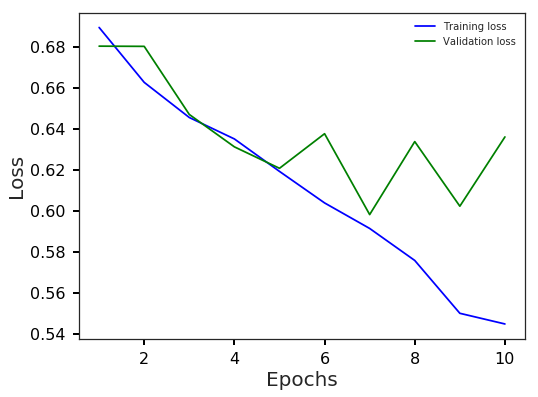

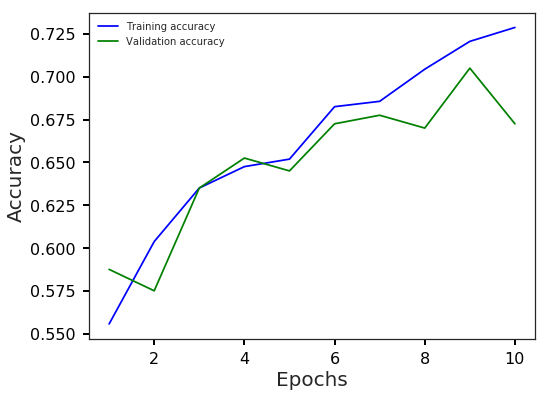

In [32]:
plot_history(history)

In [25]:
del model
del history

In [17]:
#values = list(data)
word_index=dict(list(enumerate(bows_spacy.columns.values)))
#word_index = list(bows_spacy.columns.values)

In [18]:
len(word_index)

3887

In [22]:
import os
import sys
from keras.initializers import Constant
MAX_NUM_WORDS = 20000
embeddings_index = {}
with open(os.path.join('glove.6B.100d.txt')) as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

print('Found %s word vectors.' % len(embeddings_index))

# second, prepare text samples and their labels
print('Processing text dataset')
print('Preparing embedding matrix.')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index)) + 1
embedding_matrix = np.zeros((num_words, 100))
for  i, word in word_index.items():
    if i > MAX_NUM_WORDS:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

# load pre-trained word embeddings into an Embedding layer
# note that we set trainable = False so as to keep the embeddings fixed
embedding_layer = Embedding(num_words,
                            embedding_dims,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=3887,
                            trainable=False)

print('Training model.')

Found 400000 word vectors.
Processing text dataset
Preparing embedding matrix.
Training model.


In [20]:
bows_spacy_train = bows_spacy[:1600].values
bows_spacy_val = bows_spacy[1600:].values
y_train= labels[:1600]
y_val= labels[1600:]

In [23]:
sequence_input = Input(shape=(3887,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
x = Conv1D(128, 5, activation='relu')(embedded_sequences)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(2, activation='softmax')(x)

model = Model(sequence_input, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

history = model.fit(bows_spacy_train, y_train,
          batch_size=16,
          epochs=10,
validation_data=(bows_spacy_val, y_val))

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 1416s 885ms/step - loss: 0.7222 - acc: 0.5231 - val_loss: 0.6922 - val_acc: 0.5200
Epoch 2/10
1600/1600 [==============================] - 1510s 944ms/step - loss: 0.6980 - acc: 0.4850 - val_loss: 0.6938 - val_acc: 0.5200
Epoch 3/10
1600/1600 [==============================] - 1463s 914ms/step - loss: 0.6959 - acc: 0.4913 - val_loss: 0.6926 - val_acc: 0.4850
Epoch 4/10
1600/1600 [==============================] - 1425s 891ms/step - loss: 0.6915 - acc: 0.5281 - val_loss: 0.6876 - val_acc: 0.6150
Epoch 5/10
1600/1600 [==============================] - 1423s 889ms/step - loss: 0.6953 - acc: 0.5487 - val_loss: 0.7219 - val_acc: 0.4900
Epoch 6/10
1600/1600 [==============================] - 1420s 887ms/step - loss: 0.6590 - acc: 0.6194 - val_loss: 0.6716 - val_acc: 0.5925
Epoch 7/10
1600/1600 [==============================] - 1426s 891ms/step - loss: 0.6537 - acc: 0.6238 - val_loss: 0.687

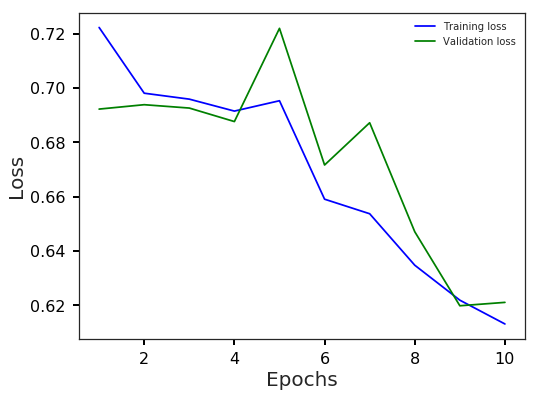

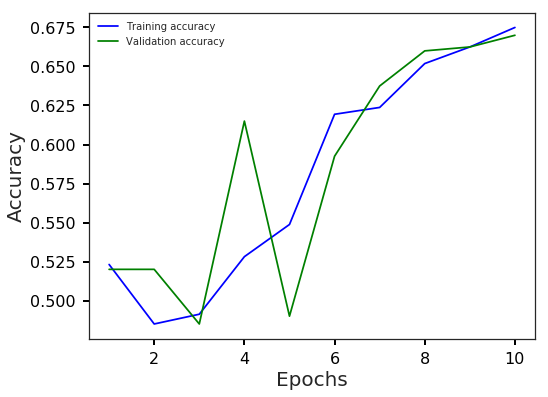

In [24]:
plot_history(history)

In [33]:
del keras_data_new
del labels
del keras_data
del model
del Tokenizer
del history

In [34]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences


In [35]:
keras_data = pd.read_csv('subject_spam.csv', index_col=0, encoding='utf8', engine='python')
keras_data.fillna("_na_", inplace = True)
keras_data = keras_data.drop(keras_data[keras_data.isspam == "_na_"].index)
spammer = {'spam ': 1,'ham ': 0} 
keras_data.isspam = [spammer[item] for item in keras_data.isspam] 
spam_index = keras_data[keras_data.isspam ==1].index
ham_index = keras_data[keras_data.isspam == 0].index
new_index = np.concatenate((spam_index[:10000], ham_index[:9997]), axis=0)
keras_data_new = keras_data.iloc[new_index]
labels = keras_data_new.isspam
keras_data_new.head()

,Subject,isspam
0,"Confidential :Soma:, Ci@lis, :P:ntermin",1
1,¢Â ÇªÁüÇÑ ¼³³¯ ÀÌº¥Æ® ÀÀ¸ðÇØ¼­ ºÎ¸ð´Ô²² ¼±¹°ÇÏ...,1
2,_na_,1
3,StOck 0ppurtunities - their sh0Oting,1
6,All your prescr[iption needs right here,1


In [36]:
VALIDATION_SPLIT = 0.2
MAX_SEQUENCE_LENGTH = 1000
EMBEDDING_DIM = 100

In [37]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(keras_data_new.Subject)
sequences = tokenizer.texts_to_sequences(keras_data_new.Subject)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

# split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

x_train = data[:-num_validation_samples].reshape(15998,1000,1)
y_train = labels[:-num_validation_samples]
x_val = data[-num_validation_samples:].reshape(3999,1000,1)
y_val = labels[-num_validation_samples:]


Found 15425 unique tokens.
Shape of data tensor: (19997, 1000)
Shape of label tensor: (19997, 2)


In [38]:
inp =  Input(shape=(1000, 1))
x = Conv1D(128, 5, activation='relu')(inp)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = MaxPooling1D(5)(x)
x = Conv1D(128, 5, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(128, activation='relu')(x)
preds = Dense(2, activation='softmax')(x)
model = Model(inp, preds)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 1000, 1)           0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 996, 128)          768       
_________________________________________________________________
max_pooling1d_7 (MaxPooling1 (None, 199, 128)          0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 195, 128)          82048     
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 39, 128)           0         
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 35, 128)           82048     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 128)               0         
__________

In [39]:
history = model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
validation_data=(x_val, y_val))

Train on 15998 samples, validate on 3999 samples
Epoch 1/10
15998/15998 [==============================] - 62s 4ms/step - loss: 2.5578 - acc: 0.5259 - val_loss: 0.9245 - val_acc: 0.5851
Epoch 2/10
15998/15998 [==============================] - 78s 5ms/step - loss: 0.8712 - acc: 0.5487 - val_loss: 0.7400 - val_acc: 0.5634
Epoch 3/10
15998/15998 [==============================] - 71s 4ms/step - loss: 0.8195 - acc: 0.5473 - val_loss: 0.7339 - val_acc: 0.5436
Epoch 4/10
15998/15998 [==============================] - 64s 4ms/step - loss: 0.7687 - acc: 0.5483 - val_loss: 0.8552 - val_acc: 0.5409
Epoch 5/10
15998/15998 [==============================] - 64s 4ms/step - loss: 0.7141 - acc: 0.5595 - val_loss: 0.7036 - val_acc: 0.5376
Epoch 6/10
15998/15998 [==============================] - 63s 4ms/step - loss: 0.6897 - acc: 0.5605 - val_loss: 0.7096 - val_acc: 0.5571
Epoch 7/10
15998/15998 [==============================] - 64s 4ms/step - loss: 0.6872 - acc: 0.5603 - val_loss: 0.6892 - val_acc:

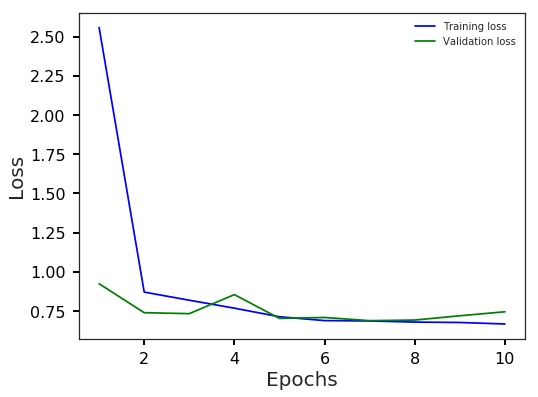

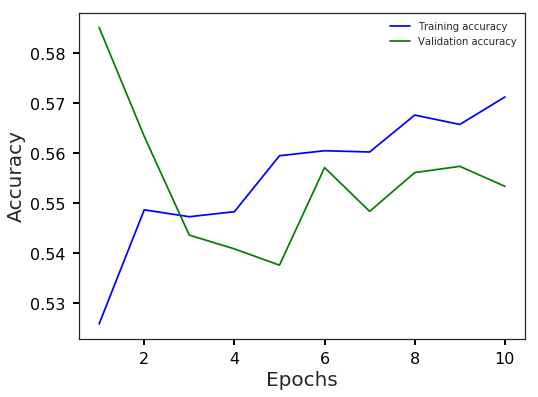

In [40]:
plot_history(history)